In [1]:
import sys, time, os, asyncio, glob
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

import pickle as pkl
from astropy.time import Time, TimeDelta

from lsst_efd_client import EfdClient
from lsst.sitcom.vandv.efd import create_efd_client

In [2]:
t_start =Time("2023-06-02T03:20:00")
t_end =  Time("2023-06-02T10:00:00")
client = EfdClient('usdf_efd')

In [21]:
from lsst.sitcom.vandv.mount import get_slew_from_mtmount, get_slew_pairs

In [4]:
mtmount=await client.select_time_series('lsst.sal.MTMount.elevation', \
                                ["*"],  t_start, t_end)
mtmount["snd_timestamp_utc"]=Time(mtmount["private_sndStamp"], format="unix_tai").unix
mtmount["snd_timestamp_utc_datetime"]=Time(mtmount["private_sndStamp"], format="unix_tai").datetime

In [22]:
starts, stops=get_slew_from_mtmount(mtmount)
starts, stops=get_slew_pairs(starts, stops)

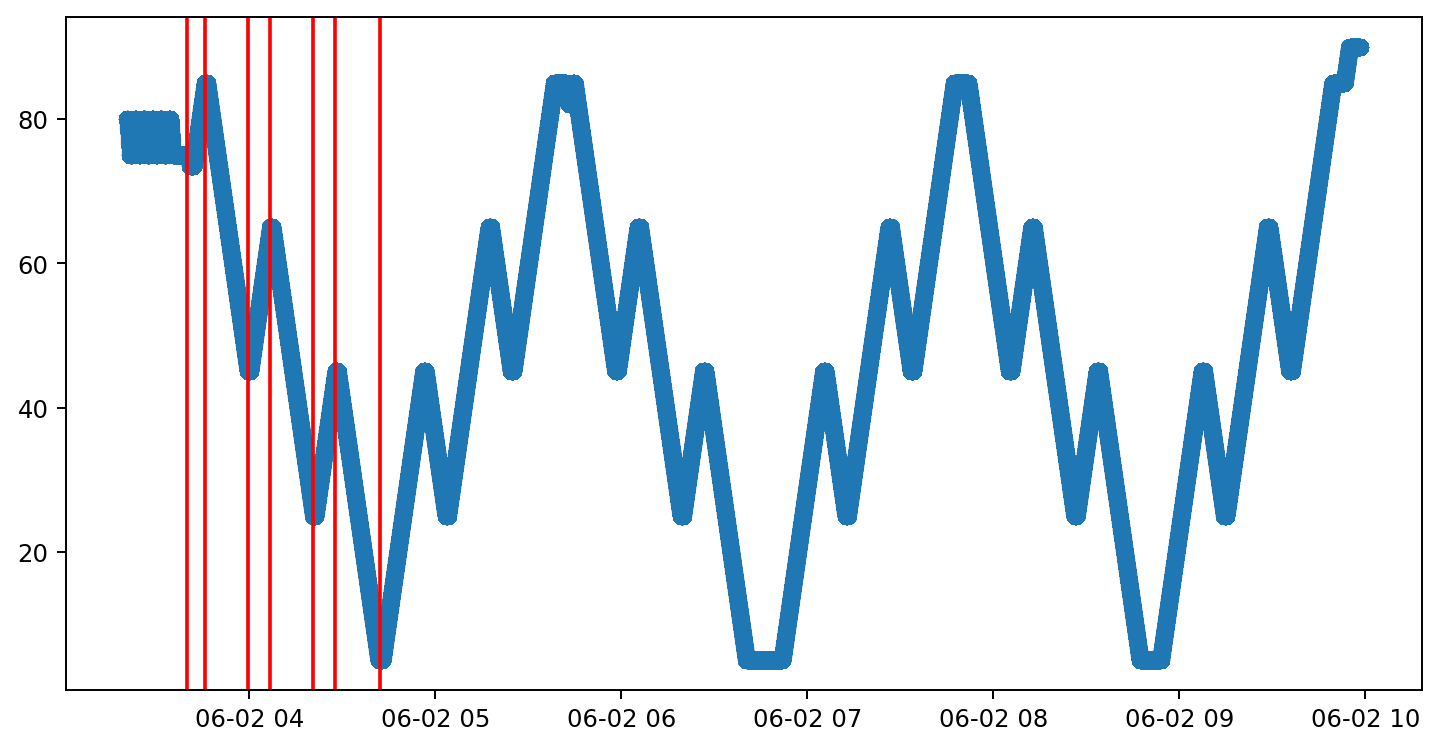

In [40]:
plt.figure(dpi=175, figsize=(10,5))
plt.scatter(mtmount["snd_timestamp_utc_datetime"], mtmount["actualPosition"])
for ct,i in enumerate(starts[swagger_ids]):
    if ct < 7:
        plt.axvline(Time(i, format="unix").datetime, c="r")
# for i in stops:
#     plt.axvline(Time(i, format="unix").datetime, c="b")


In [25]:
slewlen=starts[1:]-starts[:-1]

In [26]:
swagger_ids=np.where(slewlen > 100)[0] + 1


In [58]:
len(starts)

46

In [120]:
starts


array([1.68567601e+09, 1.68567609e+09, 1.68567617e+09, 1.68567625e+09,
       1.68567634e+09, 1.68567642e+09, 1.68567650e+09, 1.68567658e+09,
       1.68567667e+09, 1.68567675e+09, 1.68567683e+09, 1.68567719e+09,
       1.68567728e+09, 1.68567754e+09, 1.68567837e+09, 1.68567880e+09,
       1.68567964e+09, 1.68568007e+09, 1.68568094e+09, 1.68568177e+09,
       1.68568220e+09, 1.68568303e+09, 1.68568347e+09, 1.68568449e+09,
       1.68568456e+09, 1.68568465e+09, 1.68568549e+09, 1.68568592e+09,
       1.68568675e+09, 1.68568718e+09, 1.68568868e+09, 1.68568951e+09,
       1.68568994e+09, 1.68569077e+09, 1.68569120e+09, 1.68569227e+09,
       1.68569310e+09, 1.68569354e+09, 1.68569437e+09, 1.68569480e+09,
       1.68569600e+09, 1.68569683e+09, 1.68569727e+09, 1.68569810e+09,
       1.68569853e+09, 1.68569956e+09])

In [28]:
stops-starts

array([ 55.14955997,  55.25022006,  55.34965014,  55.25003004,
        55.30040002,  55.25015998,  55.34989023,  55.15206981,
        55.29800987,  54.9507401 ,  55.24988985,  34.04887986,
       233.59811997, 803.85267997, 403.71106982, 803.94915009,
       403.94887996, 803.95114994, 803.94674993, 403.91064   ,
       804.00557995, 403.9558301 , 803.89593005,  61.99994016,
        61.81278992, 803.97450018, 403.9691298 , 804.08606005,
       403.89723992, 804.25239015, 804.00153017, 403.99893999,
       803.9572401 , 403.85264015, 803.95157981, 804.19505   ,
       404.05982995, 803.99571991, 403.94815993, 803.85506988,
       804.15013003, 403.90086985, 803.79309011, 403.84899998,
       803.89836001, 103.24966002])

103.2496600151062

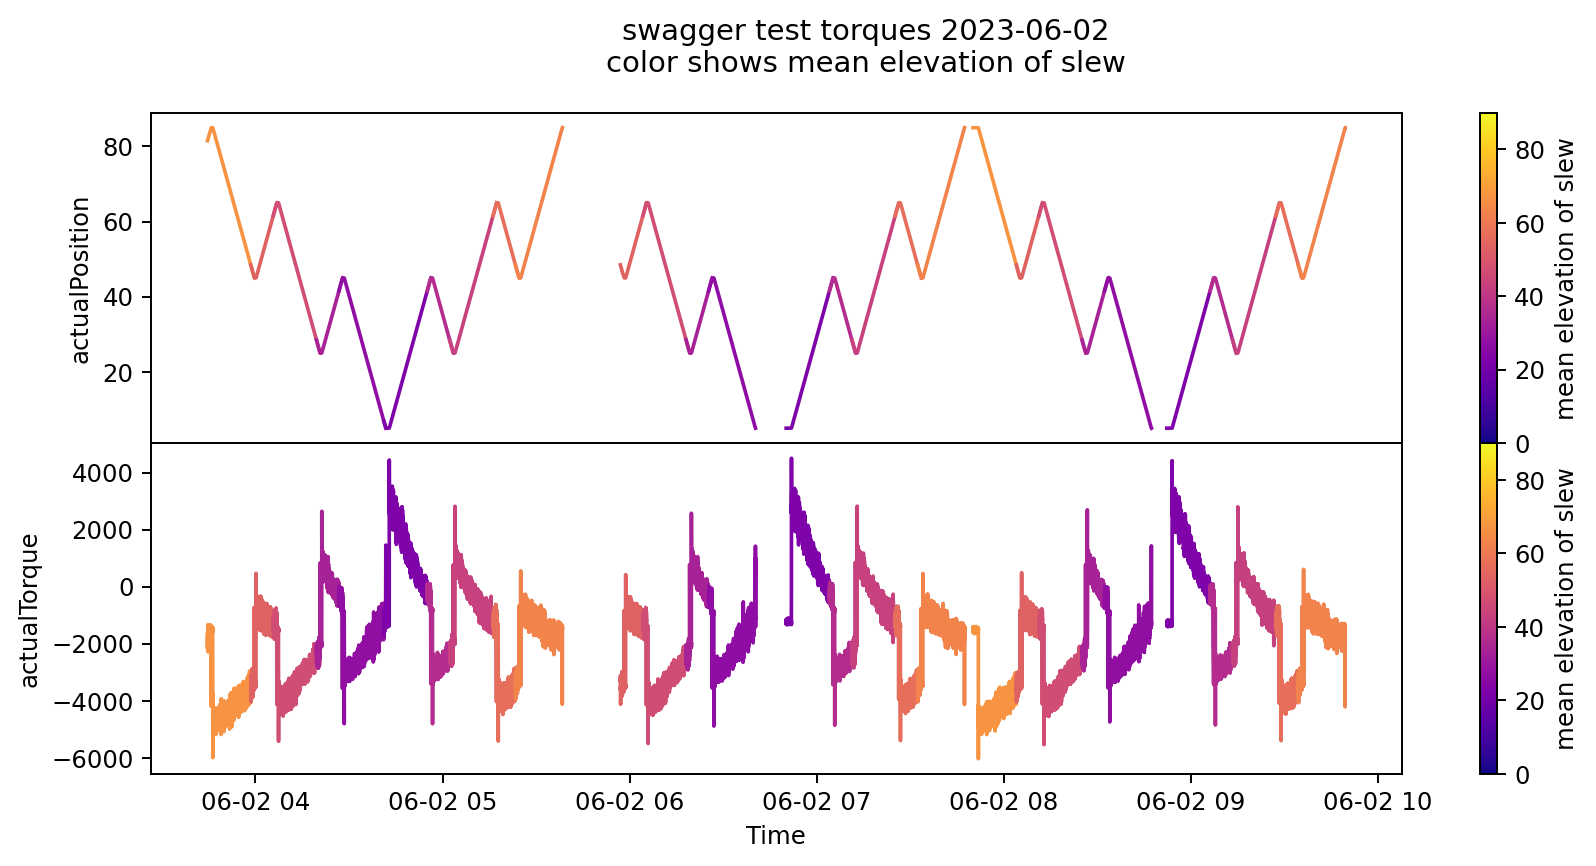

In [119]:
i=1
fig,axs=plt.subplots(2, dpi=175, figsize=(10,5), sharex=True)
plt.suptitle("swagger test torques 2023-06-02\ncolor shows mean elevation of slew") 
for i in range(len(starts[swagger_ids])):
    slew_id=swagger_ids[i]
    if stops[slew_id]- starts[slew_id] < 150:
        continue
    subframe = mtmount[(mtmount["snd_timestamp_utc"] > starts[slew_id] - 100) & (mtmount["snd_timestamp_utc"] < stops[slew_id])]
    mean_elev= subframe["actualPosition"].mean()
        
    ax=axs[0]

    ax.plot(subframe["snd_timestamp_utc_datetime"],
            subframe["actualPosition"], label=f"{mean_elev:0.0f}", color=cmap(mean_elev/90))
    
    ax=axs[1]

    ax.plot(subframe["snd_timestamp_utc_datetime"],
            subframe["actualTorque"], label=f"{mean_elev:0.0f}", color=cmap(mean_elev/90))
sm = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize(vmin=0, vmax=90))
plt.colorbar(sm, ax=axs[0], label="mean elevation of slew")
sm = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize(vmin=0, vmax=90))
plt.colorbar(sm, ax=axs[1], label="mean elevation of slew")

axs[0].set_ylabel("actualPosition")
axs[1].set_ylabel("actualTorque")
axs[1].set_xlabel("Time")
plt.tight_layout()
plt.subplots_adjust(hspace=0)

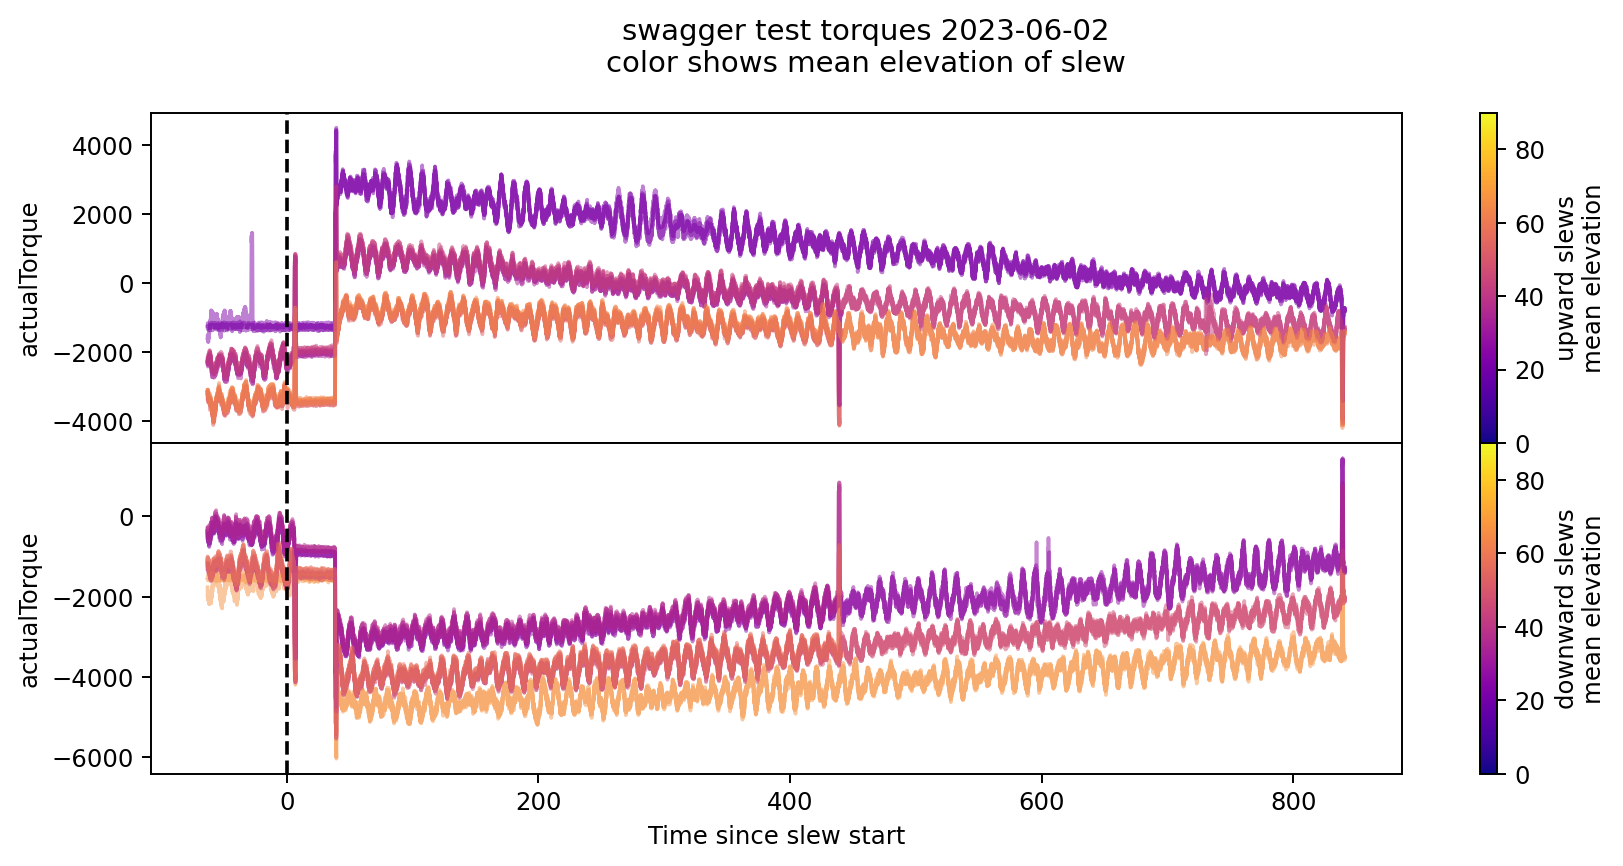

In [118]:
i=1
fig,axs=plt.subplots(2, dpi=175, figsize=(10,5), sharex=True)
plt.suptitle("swagger test torques 2023-06-02\ncolor shows mean elevation of slew") 
for i in range(len(starts[swagger_ids])):
    slew_id=swagger_ids[i]
    if stops[slew_id]- starts[slew_id] < 150:
        continue
    subframe = mtmount[(mtmount["snd_timestamp_utc"] > starts[slew_id] - 100) & (mtmount["snd_timestamp_utc"] < stops[slew_id])]
    mean_elev= subframe["actualPosition"].mean()
    if subframe["actualPosition"][0]- subframe["actualPosition"][-1] > 0:
        direction="down"
        ax=axs[1]
    if subframe["actualPosition"][0]- subframe["actualPosition"][-1] < 0:
        direction="up"
        ax=axs[0]

    ax.plot((subframe["snd_timestamp_utc_datetime"]-Time(starts[slew_id], format="unix").datetime ).values/ np.timedelta64(1, "s"),
            subframe["actualTorque"], label=f"{mean_elev:0.0f}", alpha=0.5, color=cmap(mean_elev/90))

axs[0].axvline(0, c="k", ls="dashed")
axs[1].axvline(0, c="k", ls="dashed")
axs[0].set_ylabel("actualTorque")
axs[1].set_ylabel("actualTorque")
axs[1].set_xlabel("Time since slew start")
# axs[0].set_title("slews_up")
# axs[1].set_title("slews_down")
# axs[0].legend(title="upward slew\nmean elevation", ncols=2)
# axs[1].legend(title="downward slew\nmean elevation", ncols=2)
sm = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize(vmin=0, vmax=90))
plt.colorbar(sm, ax=axs[0], label="upward slews\nmean elevation")

sm = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize(vmin=0, vmax=90))
plt.colorbar(sm, ax=axs[1], label="downward slews\nmean elevation")



plt.tight_layout()
plt.subplots_adjust(hspace=0)

In [85]:
cmap=plt.cm.plasma

In [86]:
cmap?

Signature:      cmap(X, alpha=None, bytes=False)
Type:           ListedColormap
String form:    <matplotlib.colors.ListedColormap object at 0x7f957dc28790>
File:           /opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-6.0.0/lib/python3.10/site-packages/matplotlib/colors.py
Docstring:     
Colormap object generated from a list of colors.

This may be most useful when indexing directly into a colormap,
but it can also be used to generate special colormaps for ordinary
mapping.

Parameters
----------
colors : list, array
    List of Matplotlib color specifications, or an equivalent Nx3 or Nx4
    floating point array (*N* RGB or RGBA values).
name : str, optional
    String to identify the colormap.
N : int, optional
    Number of entries in the map. The default is *None*, in which case
    there is one colormap entry for each element in the list of colors.
    If ::

        N < len(colors)

    the list will be truncated at *N*. If ::

        N > len(colors)

 

In [72]:
subframe["snd_timestamp_utc_"]-starts[slew_id]

2023-06-02 03:39:48.649630+00:00    -1.977680
2023-06-02 03:39:48.717096+00:00    -1.910214
2023-06-02 03:39:48.774389+00:00    -1.852921
2023-06-02 03:39:48.844141+00:00    -1.783169
2023-06-02 03:39:48.901653+00:00    -1.725657
                                      ...    
2023-06-02 03:40:24.393700+00:00    33.766390
2023-06-02 03:40:24.447793+00:00    33.820483
2023-06-02 03:40:24.505841+00:00    33.878531
2023-06-02 03:40:24.563759+00:00    33.936450
2023-06-02 03:40:24.627531+00:00    34.000222
Name: snd_timestamp_utc, Length: 550, dtype: float64

array([ 35.017316,  35.068058,  35.159068, ..., 140.088268, 140.168152,
       140.218231])

numpy.timedelta64(1,'s')